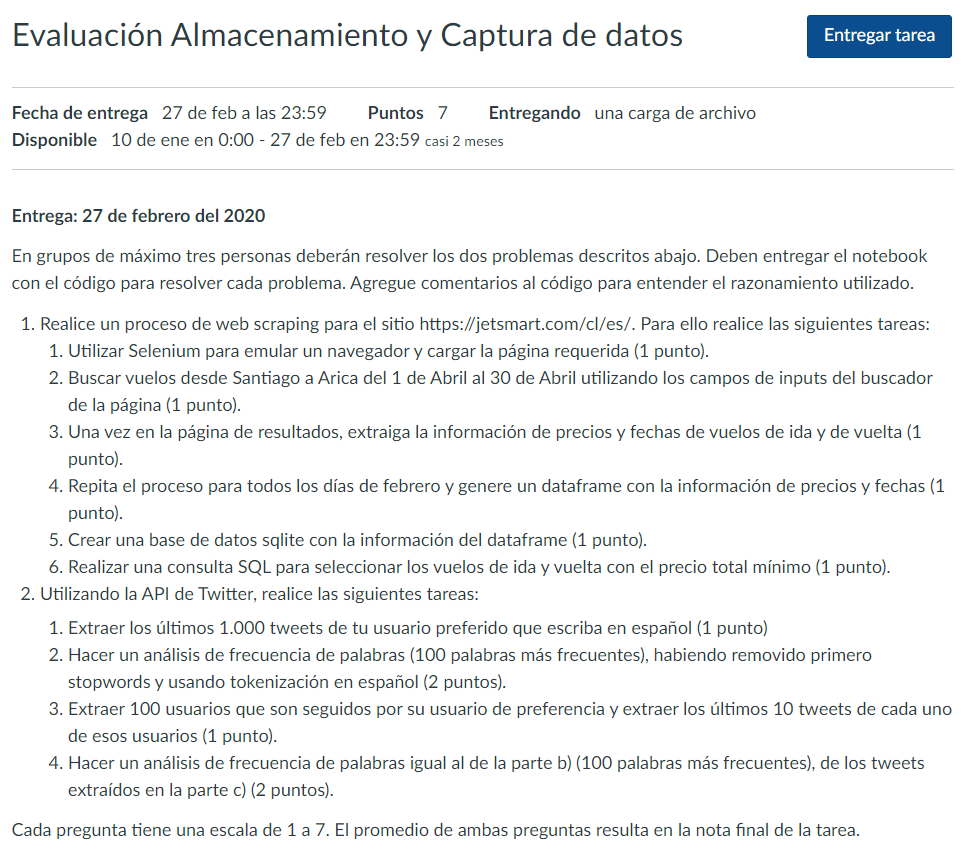

# Pregunta 1: Web scraping

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from itertools import product
from sqlalchemy import create_engine
import pandas as pd
import time
import itertools

## Navegación en la página de vuelos y obtención de datos

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.implicitly_wait(3)
driver.get("https://jetsmart.com/cl/es/") 
time.sleep(3)

try: 
    #Elimina el popup
    driver.find_element_by_id('onesignal-slidedown-cancel-button').click()
    driver.implicitly_wait(5)
except:
    pass

#Existen problemas si se expande la pantalla, se realizará un try-except.


try:
    #Es para cuando la ventana no se expande
    #Selecciona ida
    driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/route-selector/div[1]/input[1]').click()
    time.sleep(2)
    #Selecciona santiago
    driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/route-selector/div[2]/div[2]/ul[1]/li[1]/ul/li[1]').click()
    time.sleep(2)
except:
    try:
        #Es para cuando la ventana se expande
        #Selecciona ida
        driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/route-selector/div[1]/input[1]').click()
        time.sleep(2)
        #Selecciona santiago
        driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/route-selector/div[2]/div[3]/ul/li[1]').click()
        time.sleep(2)
    except:
        print("Porfavor, no jugar con el tamaño de la patantalla")

        
    
try:
    #Selecciona vuelta
    driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/route-selector/div[1]/input[2]').click()
    time.sleep(2)
    #Selecciona arica
    driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/route-selector/div[2]/div[2]/ul[1]/li[1]/ul/li[2]').click()
    time.sleep(2)
except:
    try:
        #Selecciona vuelta
        driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/route-selector/div[1]/input[2]').click()
        time.sleep(2)
        #Selecciona arica
        driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/route-selector/div[2]/div[3]/ul/li[2]').click()
        time.sleep(2)  
    except:
        print("Porfavor, no jugar con el tamaño de la patantalla")        
        
        
        
#Se crea un string vacío para que vaya cambiando y cuando llegue a Abril el bucle while se detenga
Month = ''
while Month != 'Abril':
    driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/date-selector/div[3]/div[2]/div/div[1]/span[2]').click()
    Month = driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/date-selector/div[3]/div[2]/div/div[1]/div/div/span').text
    time.sleep(1)
#Por seguridad y para consecuentes run del notebook se dejó la variable como vacía
Month =  ''


#Selecciona fecha 1 de Abril ida
driver.find_element_by_xpath('//*[@id="carousel"]/searchbox/div/div/div[1]/div/form/date-selector/div[3]/div[2]/div/div[2]/div/div[2]/div/span[4]').click()
time.sleep(2)
#Se clickea Buscar
driver.find_element_by_xpath('//*[@id="rt_button"]').click()
time.sleep(3)

#Se crean los array vacíos para agregar los precios
precios_vuelta = []
precios_ida = []


#Se aplica la misma lógica que se utilizó para detenerse en el mes. Pero en este caso se detendrá cuando llegue a la
#fecha pasada el mes de abril o 01-05.
fecha = ''
#Se crea para comprobar los valores, sin importancia además de comprobar el buen funcionamiento
#hay que considerar que falta el día 1
fecha_list = []
while fecha[4:9] != '01-05':
    #Estando en el día X se obtiene el precio de vuelta y de ida
    precio_vuelta = driver.find_element_by_xpath('//*[@id="mainContentFlight"]/section/flight-fee-selector[2]/div/div[2]/ul/flight-fee/li/div/div/div/div/div[2]/div[2]/div/div[1]/div').text
    time.sleep(2)
    precio_ida = driver.find_element_by_xpath('//*[@id="mainContentFlight"]/section/flight-fee-selector[1]/div/div[2]/ul/flight-fee/li/div/div/div/div/div[2]/div[2]/div/div[1]/div').text
    time.sleep(3)
    #Se apendiza a los array vacíos
    precios_ida.append(precio_ida)
    precios_vuelta.append(precio_vuelta)
    #Se selecciona la flecha de día siguiente
    driver.find_element_by_xpath('//*[@id="mainContentFlight"]/section/flight-fee-selector[1]/div/div[1]/div[2]/i').click()
    time.sleep(3)
    #Se obtiene la fecha utilizada en el bucle while
    fecha = driver.find_element_by_xpath('//*[@id="mainContentFlight"]/section/flight-fee-selector[1]/div/div[1]/ul/li[4]').text
    time.sleep(1)
    fecha_list.append(fecha)

fecha = ''     

driver.close()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 88.0.4324
[WDM] - Get LATEST driver version for 88.0.4324
[WDM] - Driver [C:\Users\alejo\.wdm\drivers\chromedriver\win32\88.0.4324.96\chromedriver.exe] found in cache


In [3]:
pip list --outdated

Package                Version             Latest     Type
---------------------- ------------------- ---------- -----
autopep8               1.5.4               1.5.5      wheel
Babel                  2.8.1               2.9.0      wheel
bitarray               1.6.1               1.6.3      sdist
bleach                 3.2.1               3.3.0      wheel
cffi                   1.14.3              1.14.4     wheel
chardet                3.0.4               4.0.0      wheel
cryptography           3.1.1               3.4.3      wheel
dask                   2.30.0              2021.2.0   wheel
distributed            2.30.1              2021.2.0   wheel
fsspec                 0.8.3               0.8.5      wheel
gevent                 20.9.0              21.1.2     wheel
greenlet               0.4.17              1.0.0      wheel
idna                   2.10                3.1        wheel
importlib-metadata     2.0.0               3.4.0      wheel
ipykernel              5.3.4             

## Creación del dataframe con los datos recopilados

In [4]:
#Los precios vienen como string con símbolos que no utilizaremos, por lo cual se formatea.
#Se elimina $ y el espacio vacío
precios_ida_formateado = [ (x.replace("$ ", "").replace(".", "")) for x in precios_ida]
precios_vuelta_formateado = [ (x.replace("$ ", "").replace(".", "")) for x in precios_vuelta]

In [5]:
#Se aprecia que quedan bien formateados, aunque como string.
len(precios_ida_formateado)

30

In [6]:
precios_ida_formateado

['16990',
 '16990',
 '16990',
 '16990',
 '16990',
 '16990',
 '16990',
 '15000',
 '16990',
 '16990',
 '15000',
 '15000',
 '16990',
 '15000',
 '16990',
 '16990',
 '16990',
 '15000',
 '15000',
 '16990',
 '16990',
 '16990',
 '15000',
 '15000',
 '15000',
 '16990',
 '16990',
 '15000',
 '15000',
 '15000']

In [7]:
#Se crea el índice que nos señala la combinatorias de días
index = list(itertools.product(range(1,31),range(1,31)))
index[1:5]

[(1, 2), (1, 3), (1, 4), (1, 5)]

In [8]:
#Se crea un dataframe con la combinatoria de los precios
vuelos = pd.DataFrame(list(product(precios_ida_formateado, precios_vuelta_formateado)), columns = ["ida","vuelta"], index = index)
#Se observa que existen días con combinaciones imposibles
vuelos.tail()

,ida,vuelta
"(30, 26)",15000,15000
"(30, 27)",15000,16990
"(30, 28)",15000,16990
"(30, 29)",15000,15000
"(30, 30)",15000,15000


In [9]:
#Se crea un filtro donde el día de ida  tiene que ser siempre mayor  o igual al de vuelta
filtro = [False if i[0] > i[1] else True  for i in index]

#for i in index:
#    if i[0] > i[1]:
#        filtro.append(False)
#    else:
#        filtro.append(True)

In [10]:
#Se filtran los datos
vuelos_filtrados = vuelos.iloc[filtro]
#Se transforma todo a entero
vuelos_filtrados = vuelos_filtrados.applymap(int)
#Se agrega el índice como columna
vuelos_filtrados.reset_index(inplace = True)
#Se filtran crean las columnas dia_ida y dia_vuelta a partir de la columna con tuplas
vuelos_filtrados[['dia_ida', 'dia_vuelta']] = pd.DataFrame(vuelos_filtrados['index'].tolist())
#Se seleccionan las filas útiles
vuelos_filtrados = vuelos_filtrados[["dia_ida", "dia_vuelta","ida","vuelta"]]
#Se eligen nombres más adecuados
vuelos_filtrados.columns =  ["fecha_ida", "fecha_vuelta", "precio_ida", "precio_vuelta"]

In [11]:
vuelos_filtrados

,fecha_ida,fecha_vuelta,precio_ida,precio_vuelta
0,1,1,16990,16990
1,1,2,16990,16990
2,1,3,16990,16990
3,1,4,16990,16990
4,1,5,16990,16990
...,...,...,...,...
460,28,29,15000,15000
461,28,30,15000,15000
462,29,29,15000,15000
463,29,30,15000,15000


## SQLite query

In [12]:
# Se arma el sistema sql y se genera la conección
sql_engine = create_engine('sqlite://')
connection = sql_engine.raw_connection()

In [13]:
# Se agrega el dataframe a la conección
vuelos_filtrados.to_sql('flight', connection, index=False)

In [14]:
# Se realiza el query de todo el df  para ver si la tabla quedó bien cargada
pd.read_sql("SELECT * FROM flight", connection)

,fecha_ida,fecha_vuelta,precio_ida,precio_vuelta
0,1,1,16990,16990
1,1,2,16990,16990
2,1,3,16990,16990
3,1,4,16990,16990
4,1,5,16990,16990
...,...,...,...,...
460,28,29,15000,15000
461,28,30,15000,15000
462,29,29,15000,15000
463,29,30,15000,15000


In [15]:
# Se realiza el query para obtener el minimo entre la suma del precio de ida y vuelta
pd.read_sql("SELECT fecha_ida,fecha_vuelta,  Min(precio_vuelta + precio_ida) FROM flight", connection)

,fecha_ida,fecha_vuelta,Min(precio_vuelta + precio_ida)
0,8,8,30000


# Pregunta 2: API de Twitter

In [ ]:
pip install tweepy

In [ ]:
# Librerías
import re                              
import json                            
import tweepy                          
import requests                         
import numpy as np                     
import pandas as pd                       
import matplotlib.pyplot as plt   
import nltk
from nltk.corpus import stopwords      
from requests_oauthlib import OAuth1   

# Credenciales API Twitter

In [ ]:
consumer_key = 'VyASvoXuYAoKUNYaz88ypsa7d'
consumer_secret = 'jLk3Mf1nFBc6PnGvwJfuqQUFhpcdUiBx0BZgZxgtomC1J4sus8'
access_token = '249521193-gVe9Pp2DAx6hKLA6veDsVucdrmj6zg0xs98w631f'
access_token_secret = 'vkyObEHcxOW8c2boGWNaZvjKT0PvVBOoDmYugSHGkclH2'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit=True)

El usuario que utilizaremos para realizar la parte 2 de la Tarea, correspondiente a la Utilización de la API deTwitter, corresponde al Sr. Eduardo Fuentes **@fuentesilva**, periodista y animador de televisión.
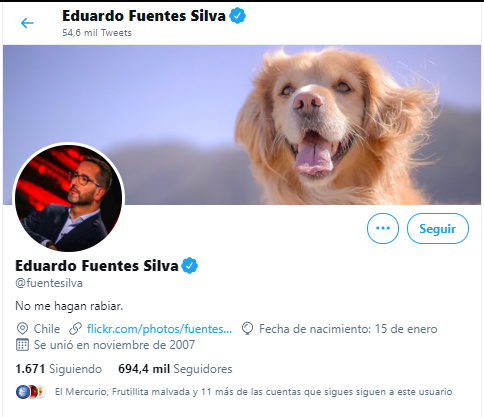


# 1. Extracción de 1000 Tweets

In [ ]:
#Definimos en userID la cuenta de Twitter de Eduardo Fuentes
userID = 'fuentesilva'

In [ ]:
#Extracción de tweets
def obtener_tweets(nombre, cantidad):
    posts = tweepy.Cursor(api.user_timeline, 
                          id=nombre,  
                          tweet_mode='extended').items(cantidad)
    return posts

In [ ]:
all_tweets = obtener_tweets(userID, 1000)

In [ ]:
#Crear un Dataframe con una columna llamada Tweets
df = pd.DataFrame([tweet.full_text for tweet in all_tweets], columns=['text'])

#Dataframe con 1000 tweets de la cuenta seleccionada
df

In [ ]:
print('Se extrajeron', df.shape[0], 'Tweets, de la cuenta', userID)

In [ ]:
#Se muestra en pantalla el primer Tweets
df.text[0]

In [ ]:
#Eliminación de acentos y viñetas
df['text'] = df['text'].str.replace('á', 'a')\
                       .str.replace('é', 'e')\
                       .str.replace('í', 'i')\
                       .str.replace('ó', 'o')\
                       .str.replace('ú', 'u')\
                       .str.replace('ñ', 'n')

#Impresión de las primeras cinco filas del dataframe
df.head()

# Remover stopwords

In [ ]:
#StopWords adicionales
adicionales = pd.read_csv('https://github.com/Alir3z4/stop-words/blob/master/spanish.txt?raw=true', header=None)
stopwords_propios = ['rt', 'uno', 'dos', 'tres', 'cuatro', 'mil', 'segun', 'si', 'parte', 
                     'tras', 'mas', 'san', 's', 'q', 'x', 'd','xq']

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
#Lista que contiene las StopWords + las StopWords adicionales
stopwords_espaniol = set().union(stopwords.words('spanish'), 
                                 stopwords.words('english'), 
                                 adicionales, 
                                 stopwords_propios) 

# Tokenización

In [ ]:
df['text'] = df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .str.replace('\d', ' ')\
          .apply(lambda x: [i for i in x.split() if not i in stopwords_espaniol])


#Se muestran las primeras 5 filas del dataframe ya limpias y Tokenizadas
df.head()

# Hacer análisis de frecuencia de Palabras

In [ ]:
df.text[0]

In [ ]:
for i in df.iloc[1:10].text:
    print(i)

In [ ]:
lista = []
for i in df.text:
    for j in i:
        lista.append(j)
        
print(lista[:50])

In [ ]:
lista_numpy = np.array(lista)

In [ ]:
unique, counts = np.unique(lista_numpy, return_counts=True)
contador = dict(zip(unique, counts))

In [ ]:
contador

In [ ]:
df_final = pd.DataFrame(contador, index=range(0,1))

In [ ]:
print('Total de palabras:', len(lista_numpy))

In [ ]:
df_final = df_final.transpose()
df_final.columns = ['frecuencia']

In [ ]:
df_final = df_final.sort_values('frecuencia', ascending=False).iloc[:100]

In [ ]:
df_final

In [ ]:
print('Lista de Frecuencia de palabras de Tweets @', userID)
print('{:20s}   {}'.format('Palabra', 'Frecuencia \n'))
for i in range(0, len(df_final)):
               print('{:20s}   {}'.format(df_final.index[i], df_final.iloc[i,0]))

# 3. Extraer 100 usuarios y los ultimos 10 Tweets de cada usuario

In [ ]:

seguidores_biobio = []
contador = 0
for friend in tweepy.Cursor(api.friends, screen_name=userID).items():
    if contador == 150:
        break
    seguidores_biobio.append(friend.screen_name)
    contador += 1

In [ ]:
len(seguidores_biobio)

In [ ]:
lista_seguidores = []
contador_lista = 1
for seguidos in seguidores_biobio:
    
    try:
        print(contador_lista, '_', seguidos)
        s_tweets = obtener_tweets(seguidos, 10)
        if len(lista_seguidores) >= 1000:
            break
        lista_seguidores.extend(s_tweets)
        contador_lista += 1
    except:
        print('################## Omitido, usuario por cuenta privada ', seguidos, '##################')
        pass        
    
    print('llevamos:', len(lista_seguidores), 'Tweets de seguidores de @', userID)

# 3.1. Stopword y Tokenizar seguidores

In [ ]:
#Crear un Dataframe con una columna llamada Tweets
df_seg = pd.DataFrame([tweet.full_text for tweet in lista_seguidores], columns=['text'])
df_seg.head()

In [ ]:
#Eliminación de acentos y viñeta
df_seg['text'] = df_seg['text'].str.replace('á', 'a')\
                               .str.replace('é', 'e')\
                               .str.replace('í', 'i')\
                               .str.replace('ó', 'o')\
                               .str.replace('ú', 'u')\
                               .str.replace('ñ', 'n')
df_seg.head()

# Tokenización

In [ ]:
df_seg['text'] = df_seg['text'].str.lower()\
                               .str.replace('(@[a-z0-9]+)\w+',' ')\
                               .str.replace('(http\S+)', ' ')\
                               .str.replace('([^0-9a-z \t])',' ')\
                               .str.replace(' +',' ')\
                               .str.replace('\d', ' ')\
                               .str.replace('bio bio', 'biobio')\
                               .apply(lambda x: [i for i in x.split() if not i in stopwords_espaniol])

df_seg.head()

# Hacer análisis de frecuencia de Palabras

In [ ]:
for i in df_seg.iloc[:9].text:
    print(i)

In [ ]:
lista_seg = []
for i in df_seg.text:
    for j in i:
        lista_seg.append(j)
        
print(lista_seg[:50])

In [ ]:
lista_seg_numpy = np.array(lista_seg)

In [ ]:
s_unique, s_counts = np.unique(lista_seg_numpy, return_counts=True)
s_contador = dict(zip(s_unique, s_counts))

In [ ]:
df_seg_final = pd.DataFrame(s_contador, index=range(0,1))

In [ ]:
print('Total de palabras:', len(lista_seg_numpy))

In [ ]:
df_seg_final = df_seg_final.transpose()
df_seg_final.columns = ['frecuencia']

In [ ]:
df_seg_final = df_seg_final.sort_values('frecuencia', ascending=False).iloc[:99]

In [ ]:
df_seg_final

In [ ]:
print('Lista de Frecuencia de palabras de Tweets  de Seguidores de ', userID, '\n')
print('{:20s}   {}'.format('Palabra', 'Frecuencia \n'))
for i in range(0, len(df_seg_final)):
               print('{:20s}   {}'.format(df_seg_final.index[i], df_seg_final.iloc[i,0]))